In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [28]:
dataset = pd.read_csv('Diabetes.csv')

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
features = ['Glucose', 'Insulin','BMI','DiabetesPedigreeFunction','Age','Pregnancies']

In [31]:
train_x = dataset[features]

In [32]:
characteristics = ['Outcome']

In [33]:
train_y = dataset[characteristics]

In [34]:
#from pandas_profiling import ProfileReport

In [35]:
#df_report = ProfileReport(dataset, minimal = False)

In [36]:
#df_report.to_file(output_file = "Diabetes.html")

In [37]:
#dataset = pd.DataFrame(dataset)

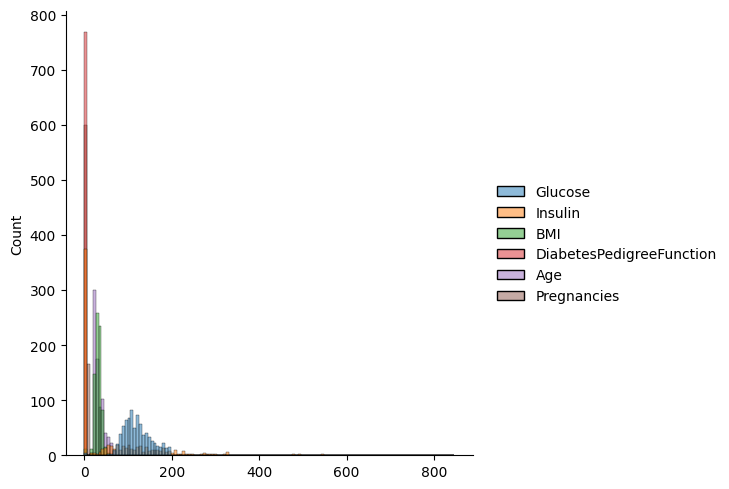

In [38]:
sns.displot( data = train_x,height = 5)

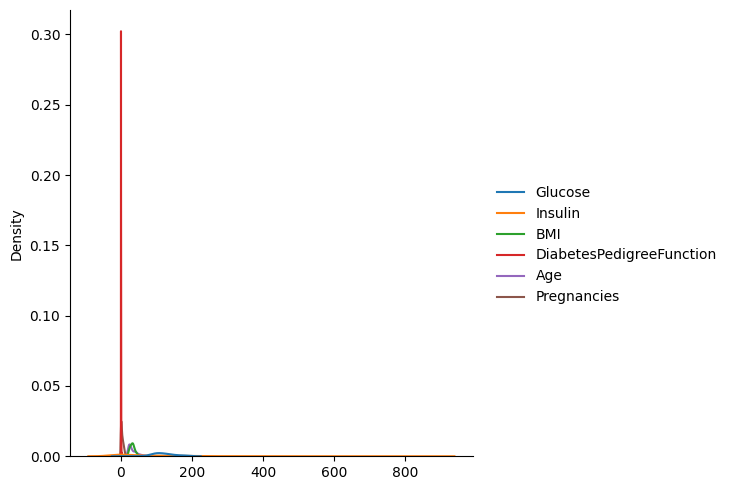

In [39]:
sns.displot(data= train_x, kind="kde")


<AxesSubplot: xlabel='BMI', ylabel='Insulin'>

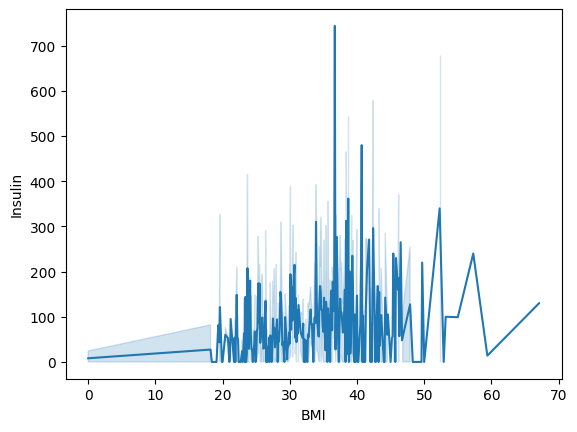

In [40]:
sns.lineplot(data= dataset, x="BMI", y="Insulin")

<AxesSubplot: xlabel='BloodPressure', ylabel='Density'>

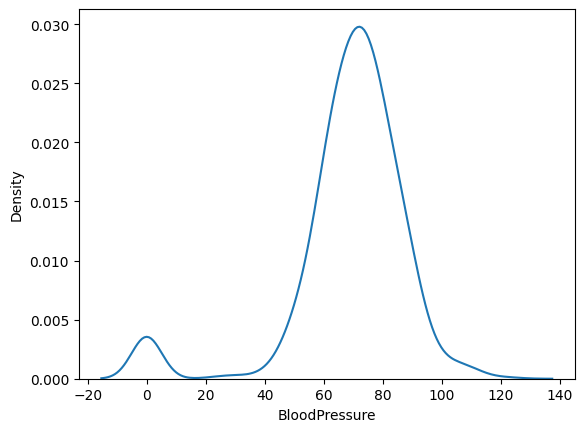

In [41]:
sns.kdeplot(data= dataset, x="BloodPressure")

<AxesSubplot: xlabel='BMI', ylabel='BloodPressure'>

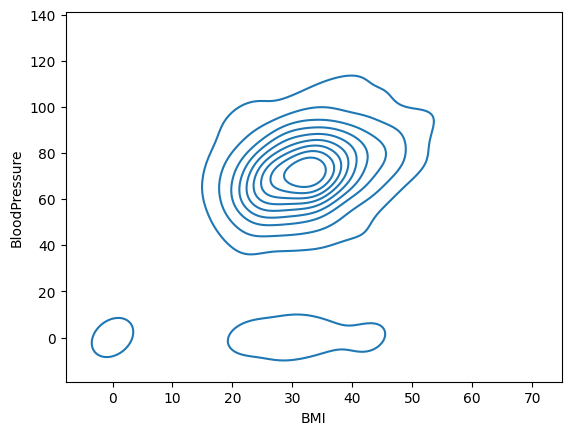

In [42]:
sns.kdeplot(data=dataset, x="BMI", y = "BloodPressure")

<AxesSubplot: xlabel='Outcome', ylabel='BMI'>

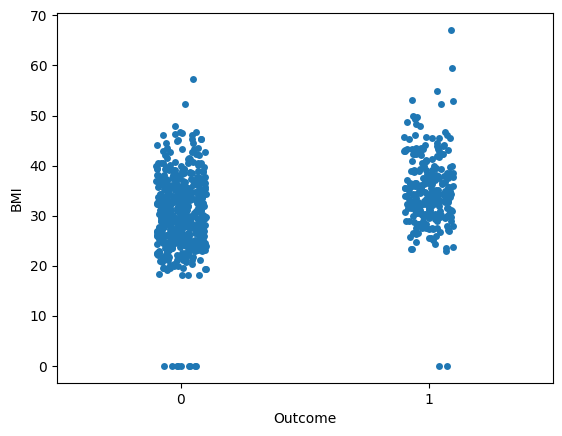

In [43]:
sns.stripplot(data=dataset, x="Outcome", y="BMI")

<AxesSubplot: xlabel='BMI', ylabel='BloodPressure'>

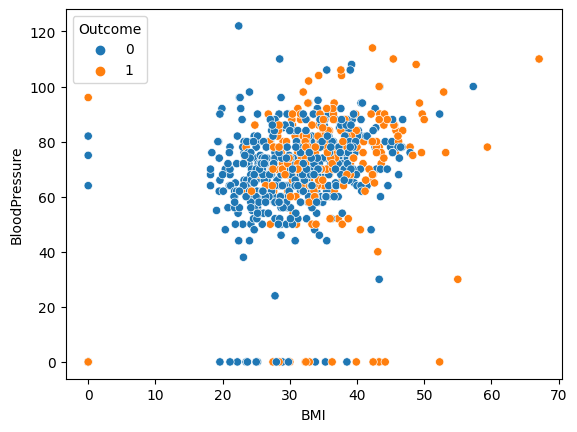

In [44]:
sns.scatterplot(data=dataset, x="BMI", y="BloodPressure", hue="Outcome")

<AxesSubplot: xlabel='BMI', ylabel='Age'>

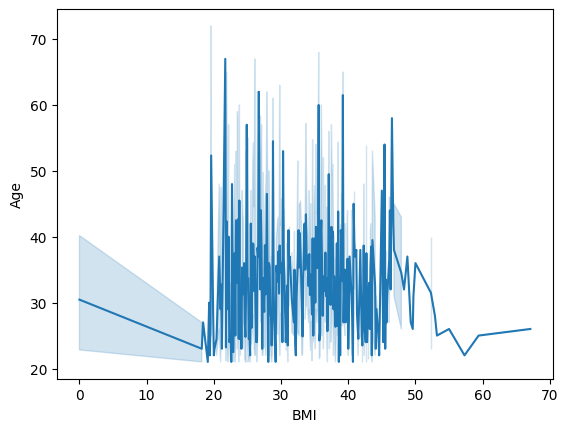

In [45]:
sns.lineplot(data=dataset, x="BMI", y="Age")

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [48]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))  #print 10 best features

     Specs        Score
4  Insulin  2175.565273
1  Glucose  1411.887041
7      Age   181.303689
5      BMI   127.669343


C:\Users\abdir\AppData\Local\Temp\ipykernel_9696\1221810177.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x,train_y)


[0.2862821  0.09680273 0.17470631 0.1459476  0.17111002 0.12515124]


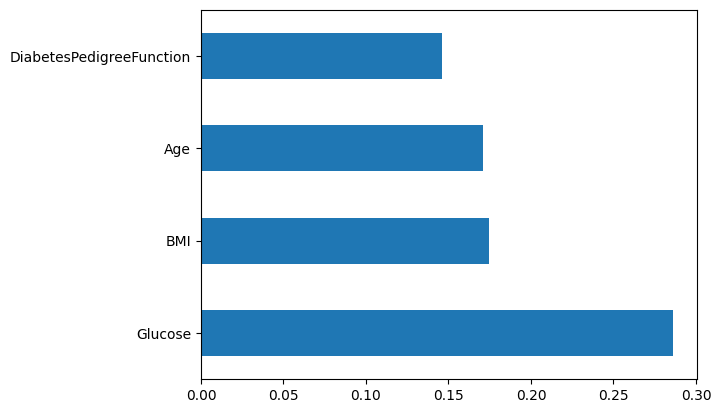

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(train_x,train_y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=train_x.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

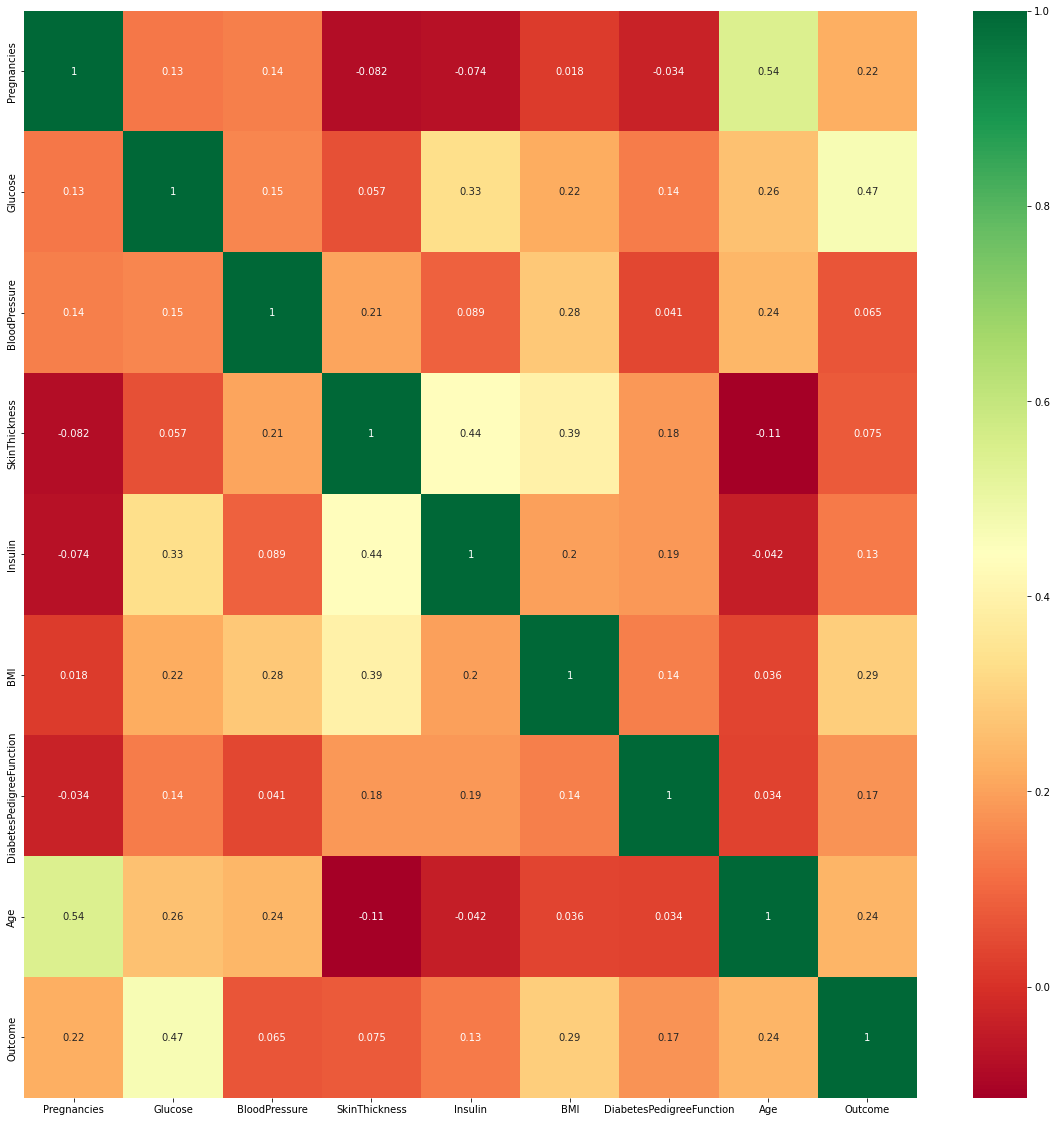

In [346]:
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [347]:
#x = train_x.iloc[:,:].values
#y = train_y.iloc[:,:].values

In [348]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [349]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [350]:
#from xgboost import XGBClassifier
#classifier = XGBClassifier()
#classifier.fit(x_train, y_train)

In [351]:
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 0)
#classifier.fit(x_train, y_train)

In [352]:
ann = tf.keras.models.Sequential()

In [353]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [354]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [355]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [356]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [357]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
20/20 [==============================] - 2s 5ms/step - loss: 0.6825 - accuracy: 0.5912
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6499 - accuracy: 0.6189
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6248 - accuracy: 0.6384
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6030 - accuracy: 0.6564
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5861 - accuracy: 0.6612
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5730 - accuracy: 0.6726
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5625 - accuracy: 0.6840
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5529 - accuracy: 0.6889
Epoch 9/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5449 - accuracy: 0.6889
Epoch 10/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5376 - accuracy: 0.6889
Epoch 11/

Epoch 83/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4362 - accuracy: 0.7801
Epoch 84/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4356 - accuracy: 0.7801
Epoch 85/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4354 - accuracy: 0.7801
Epoch 86/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4353 - accuracy: 0.7850
Epoch 87/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4349 - accuracy: 0.7818
Epoch 88/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4349 - accuracy: 0.7850
Epoch 89/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4344 - accuracy: 0.7883
Epoch 90/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4343 - accuracy: 0.7834
Epoch 91/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4349 - accuracy: 0.7834
Epoch 92/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4338 - accuracy: 0.7818


In [362]:
y_pred = ann.predict(x_test)

5/5 [==============================] - 0s 4ms/step


In [401]:
list = []
for number in y_pred:

    if number >=0.5:
        number = 1
    else:
        number = 0
    print(number)
    print(np.concatenate((number.reshape(len(number)))))
    

1


TypeError: dispatcher for __array_function__ did not return an iterable

0